In [21]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
df.shape

(537577, 12)

## Deleting Null Coulmns


In [6]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [8]:
df.shape

(537577, 10)

## Finding Unique Values in each Columns

In [9]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Purchase                      17959
dtype: int64

In [10]:

for column in df.columns:
    print(df[column].nunique(), "\t: ", column)

5891 	:  User_ID
3623 	:  Product_ID
2 	:  Gender
7 	:  Age
21 	:  Occupation
3 	:  City_Category
5 	:  Stay_In_Current_City_Years
2 	:  Marital_Status
18 	:  Product_Category_1
17959 	:  Purchase


## Visualizing the data

<AxesSubplot:ylabel='None'>

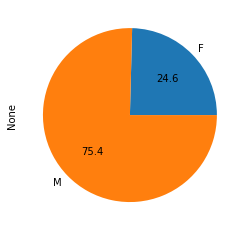

In [11]:
df.groupby("Gender").size().plot(kind='pie',autopct='%0.1f')

<AxesSubplot:xlabel='Gender'>

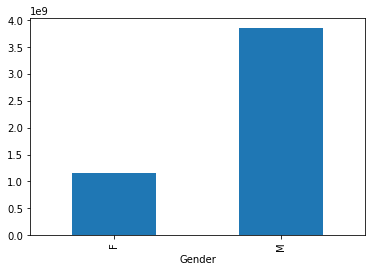

In [12]:
df.groupby("Gender").sum()['Purchase'].plot(kind='bar')

In [13]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


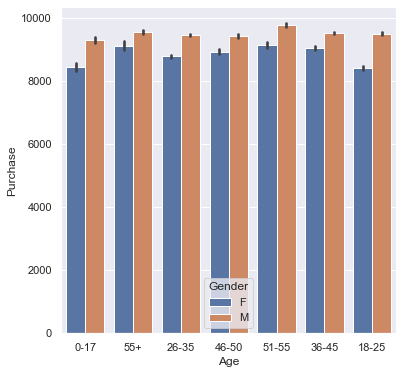

In [40]:
sns.set(rc={'figure.figsize': (6,6)})
sns.barplot(x='Age',y='Purchase',data=df,hue='Gender');

## Unique Distribution of Product_ID by Age

In [44]:
lst=[]

for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
    
data=pd.DataFrame(lst,columns=['Age','Product_ID'])

<AxesSubplot:xlabel='Age', ylabel='Product_ID'>

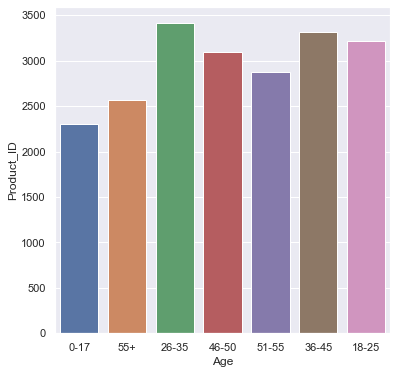

In [46]:
sns.barplot(x='Age',y='Product_ID',data=data)

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

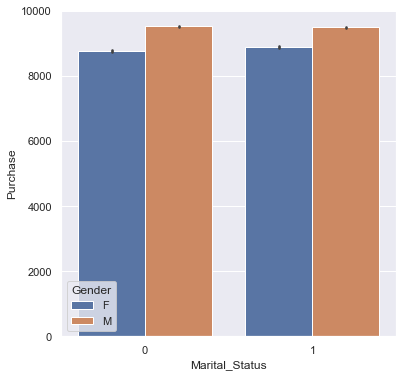

In [55]:
sns.barplot(x='Marital_Status',y='Purchase',data=df,hue='Gender')

In [57]:
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i]+"_"+str(df['Marital_Status'][i]))
df['MaritalGender']=l

In [58]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<AxesSubplot:xlabel='MaritalGender', ylabel='Purchase'>

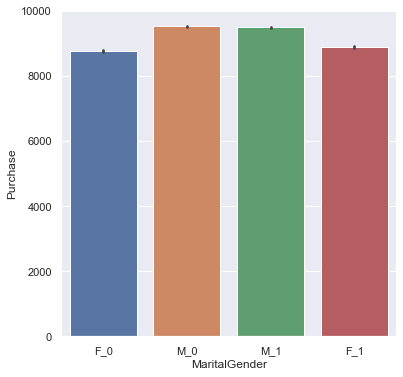

In [60]:
sns.barplot(x='MaritalGender',y='Purchase',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

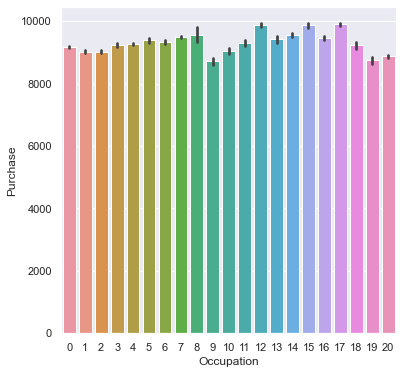

In [64]:
sns.barplot(x='Occupation',y='Purchase',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

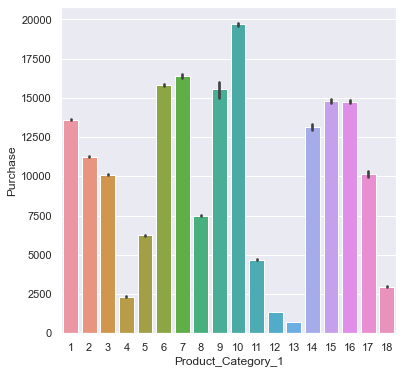

In [62]:
sns.barplot(x='Product_Category_1',y='Purchase',data=df)

<AxesSubplot:xlabel='Occupation'>

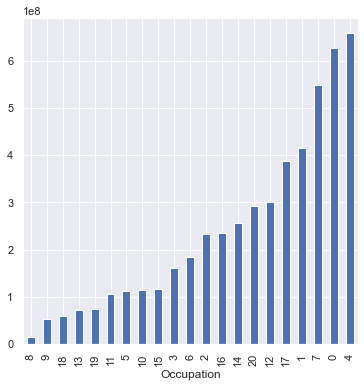

In [66]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_1'>

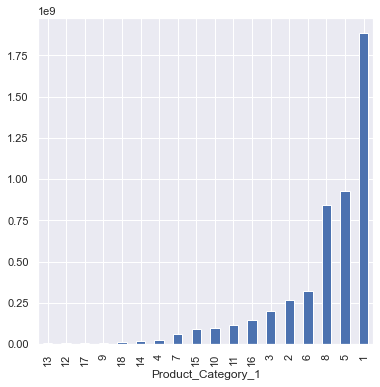

In [67]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

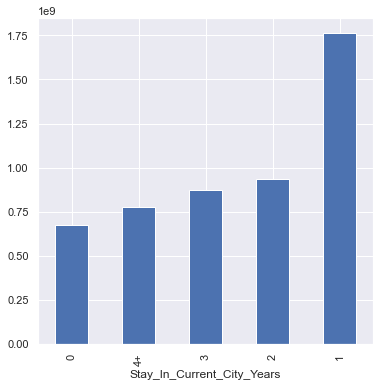

In [69]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='City_Category'>

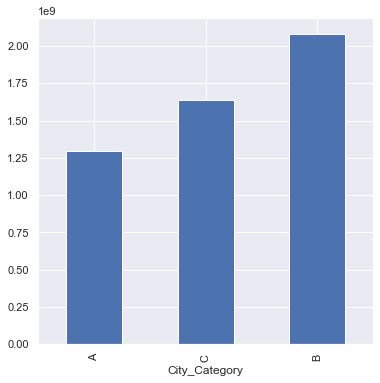

In [70]:
df.groupby('City_Category').sum()['Purchase'].sort_values().plot(kind='bar')

<AxesSubplot:ylabel='Purchase'>

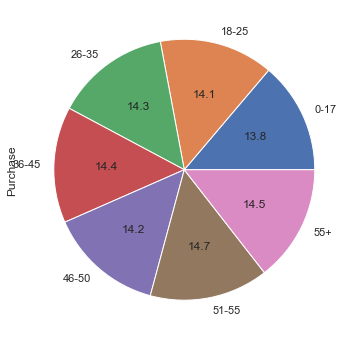

In [71]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', autopct = '%0.1f')

<AxesSubplot:xlabel='Gender', ylabel='count'>

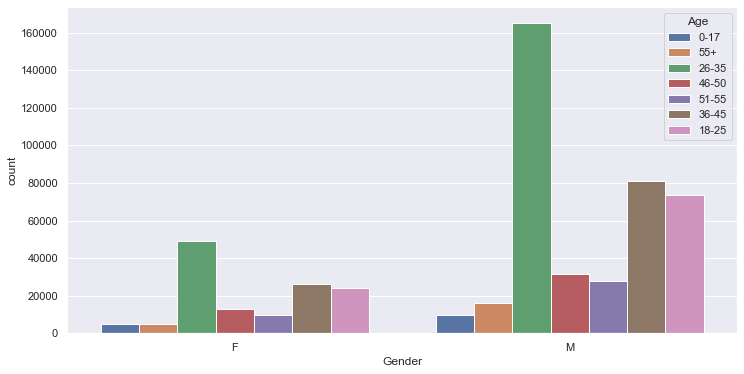

In [72]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Gender", hue = 'Age', data = df)

<AxesSubplot:xlabel='Age', ylabel='count'>

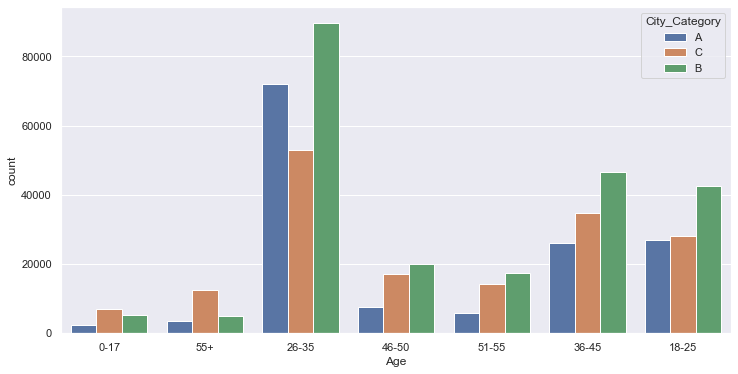

In [73]:
sns.countplot(x = 'Age', hue = 'City_Category', data = df)

<AxesSubplot:ylabel='None'>

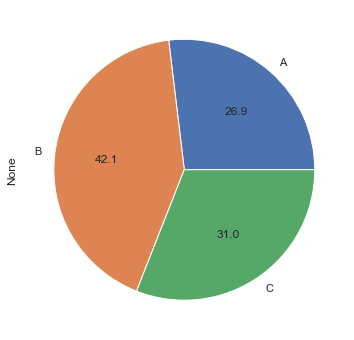

In [74]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f')

<AxesSubplot:ylabel='Purchase'>

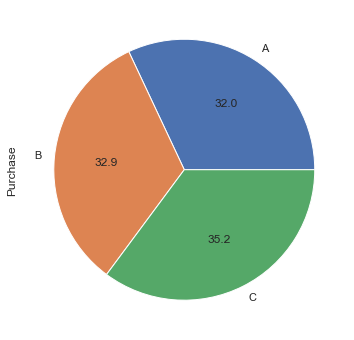

In [75]:
df.groupby('City_Category').mean()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

<AxesSubplot:ylabel='None'>

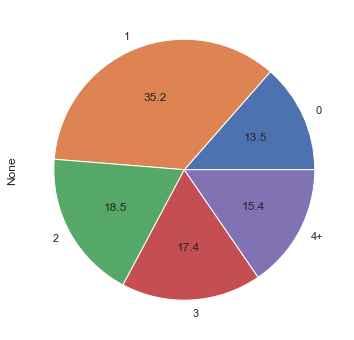

In [76]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = "%.1f")

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

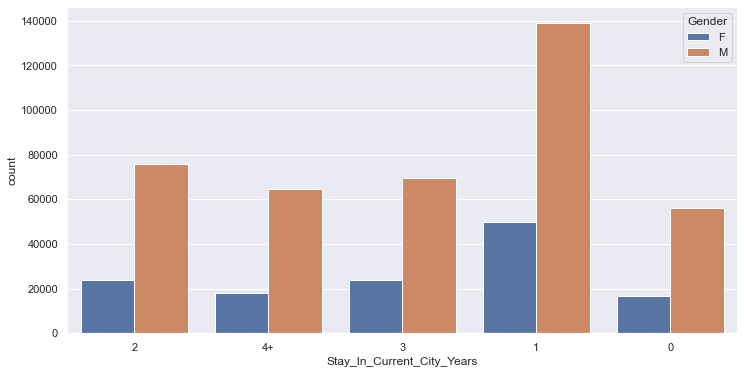

In [77]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

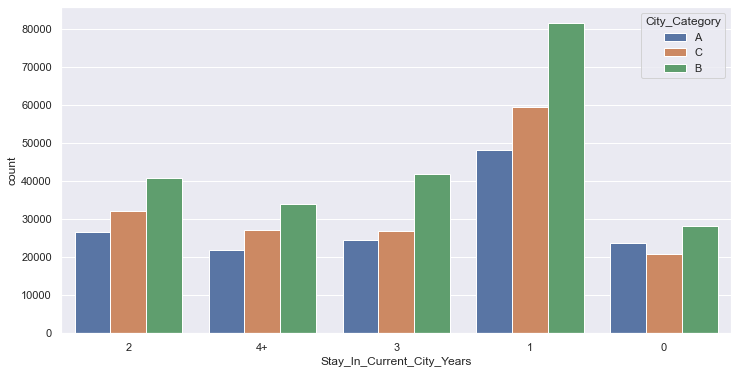

In [78]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)